In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

# 인구통계

In [ ]:
df_ggd_population = pd.read_csv('/content/drive/MyDrive/AIFFEL 해커톤/연령_성별_인구_경기도.csv', encoding='cp949')
df_ggd_population

In [ ]:
ggd_population = df_ggd_population.copy()
ggd_population = ggd_population[['행정구역별(읍면동)','연령별','2019']]
ggd_population.columns = ggd_population.loc[0]
ggd_population = ggd_population.drop([0])
ggd_population

In [ ]:
ggd2030 = ggd_population
ggd2030['연령별'].astype('str')
ggd2030 = ggd2030[(ggd2030['연령별']=='20~24세') | (ggd2030['연령별']=='25~29세') | (ggd2030['연령별']=='30~34세') | (ggd2030['연령별']=='35~39세')]
ggd2030

In [ ]:
for region in ggd2030['행정구역별(읍면동)'].unique():
  new_row = {'행정구역별(읍면동)': region, '연령별': '2030', 
             '총인구(명)': sum(ggd2030[ggd2030['행정구역별(읍면동)']==region]['총인구(명)'].astype('int64')),
             }
  ggd2030 = ggd2030.append(new_row, ignore_index=True)

ggd2030

In [ ]:
ggd2030 = ggd2030[ggd2030['연령별']=='2030']
ggd2030

### 경기도 지역별 2030 인구

In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(data=ggd2030.sort_values(by='총인구(명)',ascending=False),x='총인구(명)',y='행정구역별(읍면동)',palette='Blues_d')
plt.title('경기도 지역별 2030 인구',fontsize=20)

In [ ]:
ggd_total = ggd_population[ggd_population['연령별']=='합계']
ggd_total

### 경기도 지역별 2030 비율

In [ ]:
ggd2030_ratio = pd.merge(ggd2030, ggd_total, on='행정구역별(읍면동)')
ggd2030_ratio = ggd2030_ratio[['행정구역별(읍면동)','총인구(명)_x','총인구(명)_y']]
ggd2030_ratio.columns = ['컬럼2030인구','총인구']
ggd2030_ratio.set_index('컬럼2',inplace=True)
ggd2030_ratio = ggd2030_ratio[['2030인구','총인구']].astype('float')
ggd2030_ratio['2030비율'] = ggd2030_ratio['2030인구'] / ggd2030_ratio['총인구']
ggd2030_ratio

In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(data=ggd2030_ratio.sort_values(by='2030비율',ascending=False),x='2030비율',y=ggd2030_ratio.index,palette='Blues_d')
plt.title('경기도 지역별 2030 인구비율',fontsize=20)

# 쏘카존 

In [ ]:
df_socar_zone = pd.read_csv('/content/drive/MyDrive/아이펠_해커톤/hackathon_data/20210823_socar_zone.csv')
df_socar_zone.head()

In [ ]:
socar_zone = df_socar_zone.copy()
socar_zone.head()

In [ ]:
cluster_0 = ['A', 'B']
cluster_1 = ['I','C', 'D', 'G']
cluster_2 = ['H','J', 'K', 'L']
cluster_3 = ['M', 'N', 'O']
cluster_4 = ['P']

def int_cluster(x):
  if x in cluster_0:
    return 0
  elif x in cluster_1:
    return 1
  elif x in cluster_2:
    return 2
  elif x in cluster_3:
    return 3
  elif x in cluster_4:
   return 4

socar_zone_region['Cluster_num'] = socar_zone_region['컬럼2'].map(lambda x : int_cluster(x))

In [ ]:
socar_zone_region_cluster = pd.DataFrame(socar_zone_region.groupby('Cluster_num')['쏘카존개수'].mean())

In [ ]:
socar_zone_region_cluster

### 군집별 쏘카존 수 순위

In [ ]:
socar_zone_region_cluster['rank'] = socar_zone_region_cluster['쏘카존개수'].rank(method='average',ascending=False)
socar_zone_region_cluster[['rank']].sort_values(by='rank')

,rank
Cluster_num,
0,1.0
2,2.0
1,3.0
3,4.0
4,5.0


In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(data=socar_zone_region_cluster,x=socar_zone_region_cluster.index,y=socar_zone_region_cluster['쏘카존개수'],palette='Blues_d')
plt.title('Cluster별 쏘카존 개수',fontsize=20)

# 버스정류장

In [ ]:
df_bus_station = pd.read_csv('/content/drive/MyDrive/아이펠_해커톤/hackathon_data/쏘카트랙_QGIS/시군구별_버스정류장개수.csv')
df_bus_station

In [ ]:
bus_station = df_bus_station.copy()
bus_station.drop(['SIG_CD', 'SIG_ENG_NM'], axis=1, inplace=True)
bus_station.rename(columns={'SIG_KOR_NM':'컬럼2',
                            'NUMPOINTS' : '버스정류장수'}, inplace=True)
bus_station

In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(data=bus_station.sort_values(by='버스정류장수',ascending=False),x='버스정류장수',y='컬럼2',palette='Blues_d')
plt.title('경기도 지역별 버스정류장수 개수',fontsize=20)

In [ ]:
bus_station['Cluster_num'] = bus_station['컬럼2'].map(lambda x : int_cluster(x))

In [ ]:
bus_station_cluster = pd.DataFrame(bus_station.groupby('Cluster_num')['버스정류장수'].mean())
bus_station_cluster

,버스정류장수
Cluster_num,
0,567.500000
1,915.166667
2,762.250000
3,648.000000
4,1089.000000


Text(0.5, 1.0, 'Cluster별 버스정류장수 개수')

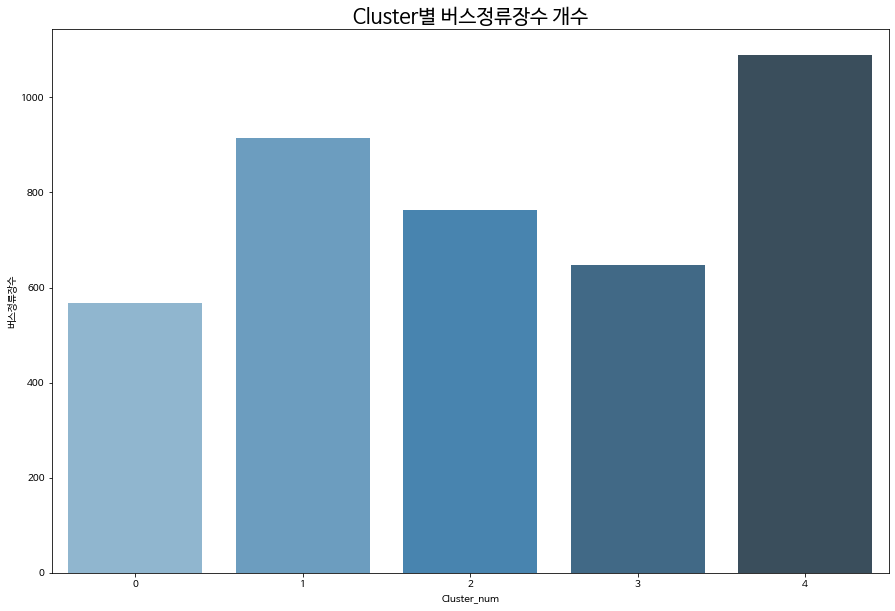

In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(data=bus_station_cluster,x=bus_station_cluster.index,y=bus_station_cluster['버스정류장수'],palette='Blues_d')
plt.title('Cluster별 버스정류장수 개수',fontsize=20)

### 지역별 면적 출처 링크

https://kosis.kr/statHtml/statHtml.do?orgId=460&tblId=TX_315_2009_H1009&conn_path=I2




In [ ]:
df_컬럼2_area = pd.read_csv('/content/drive/MyDrive/아이펠_해커톤/hackathon_data/지역별면적/분석지역면적.csv', encoding='cp949') 

In [ ]:
df_컬럼2_area

# 데이터프레임 재생성

In [ ]:
컬럼2_area = df_컬럼2_area.copy()
컬럼2_area = 컬럼2_area.rename(columns=컬럼2_area.iloc[1])
컬럼2_area = 컬럼2_area.drop(컬럼2_area.index[0:2]).reset_index(drop=True)
컬럼2_area

In [ ]:
컬럼2_area = df_컬럼2_area.copy()
컬럼2_area = 컬럼2_area.rename(columns=컬럼2_area.iloc[1])
컬럼2_area = 컬럼2_area.drop(컬럼2_area.index[0:2]).reset_index(drop=True)
컬럼2_area.columns = ['region1', '컬럼2', '면적합계(㎢)', '도시지역면적', '도시지역비율', '비도시지역면적', '비도시지역비율']

# 면적을 ㎢로 단위로 변환
컬럼2_area['면적합계(㎢)'] = 컬럼2_area['면적합계(㎢)'].astype(float)
컬럼2_area['도시지역면적'] = 컬럼2_area['도시지역면적'].astype(float)
컬럼2_area['비도시지역면적'] = 컬럼2_area['비도시지역면적'].astype(float)

컬럼2_area['면적합계(㎢)'] = 컬럼2_area['면적합계(㎢)'].map(lambda x: round(x/1000000, 2))
컬럼2_area['도시지역면적'] = 컬럼2_area['도시지역면적'].map(lambda x: round(x/1000000, 2))
컬럼2_area['비도시지역면적'] = 컬럼2_area['비도시지역면적'].map(lambda x: round(x/1000000, 2))

컬럼2_area = 컬럼2_area.drop(['컬럼1'], axis=1)
컬럼2_area

### 1㎢ 당 버스정류장 개수 컬럼 추가

In [ ]:
merge_bus_area['1㎢당_버스정류장_개수'] =  merge_bus_area['버스정류장수'] / merge_bus_area['면적합계(㎢)']
merge_bus_area

## 지역별 단위면적당 버스정류장, 쏘카존 수

In [ ]:
merge_bus_socar_area = pd.merge(merge_bus_area, socar_zone_region, how='left',on='컬럼2')

In [ ]:
merge_bus_socar_area['1㎢당_쏘카존_개수'] =  merge_bus_socar_area['쏘카존개수'] / merge_bus_socar_area['면적합계(㎢)']
merge_bus_socar_area

In [ ]:
cluster_0 = ['A', 'B']
cluster_1 = ['I', 'C', 'D', 'E', 'F', 'G']
cluster_2 = ['H','J', 'K', 'L']
cluster_3 = ['M', 'N', 'O']
cluster_4 = ['P']

def int_cluster(x):
  if x in cluster_0:
    return 0
  elif x in cluster_1:
    return 1
  elif x in cluster_2:
    return 2
  elif x in cluster_3:
    return 3
  elif x in cluster_4:
   return 4

merge_bus_socar_area['Cluster_num'] = merge_bus_socar_area['컬럼2'].map(lambda x : int_cluster(x))

## 군집별 단위면적당 쏘카존, 버스정류장 수

In [ ]:
merge_bus_socar_area_cluster = pd.DataFrame(merge_bus_socar_area.groupby('Cluster_num')[['1㎢당_버스정류장_개수', '1㎢당_쏘카존_개수']].mean())
merge_bus_socar_area_cluster

,1㎢당_버스정류장_개수,1㎢당_쏘카존_개수
Cluster_num,,
0,14.012032,0.848848
1,7.303430,0.395939
2,7.702229,0.444807
3,9.217221,0.513785
4,1.240814,0.005697


Text(0.5, 1.0, 'Cluster별 1㎢당_버스정류장_개수')

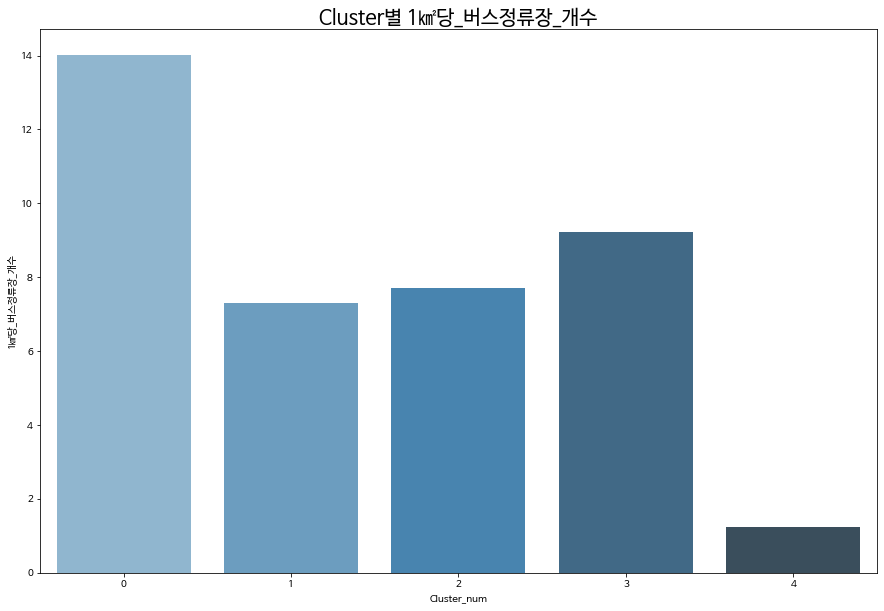

In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(data=merge_bus_socar_area_cluster,x=merge_bus_socar_area_cluster.index,y=merge_bus_socar_area_cluster['1㎢당_버스정류장_개수'],palette='Blues_d')
plt.title('Cluster별 1㎢당_버스정류장_개수',fontsize=20)

# 사업체 

In [ ]:
industry = pd.read_csv('/content/drive/MyDrive/아이펠_해커톤/hackathon_data/산업중분류_종사자규모_및_시군별_사업체수__종사자수.csv', encoding = 'cp949')
industry.head()

In [ ]:
industry = industry.T
industry

In [ ]:
companies_cluster = pd.DataFrame(companies.groupby('Cluster_num')['사업체수(개)'].mean())
companies_cluster

,사업체수(개)
Cluster_num,
0,1.648564e+09
1,1.112789e+29
2,9.808069e+18
3,8.557721e+13
4,8.362000e+03


## 군집별 산업군별 사업체 수

In [ ]:
industry_n_ratio_t = industry_n_ratio.T
industry_n_ratio_t = industry_n_ratio_t.fillna(0)
industry_n_ratio_t.reset_index(inplace=True)

In [ ]:
industry_n_ratio_t.rename(columns={'index' : '컬럼2'}, inplace=True)

In [ ]:
industry_n_ratio_t['Cluster_num'] = industry_n_ratio_t['컬럼2'].map(lambda x : int_cluster(x))

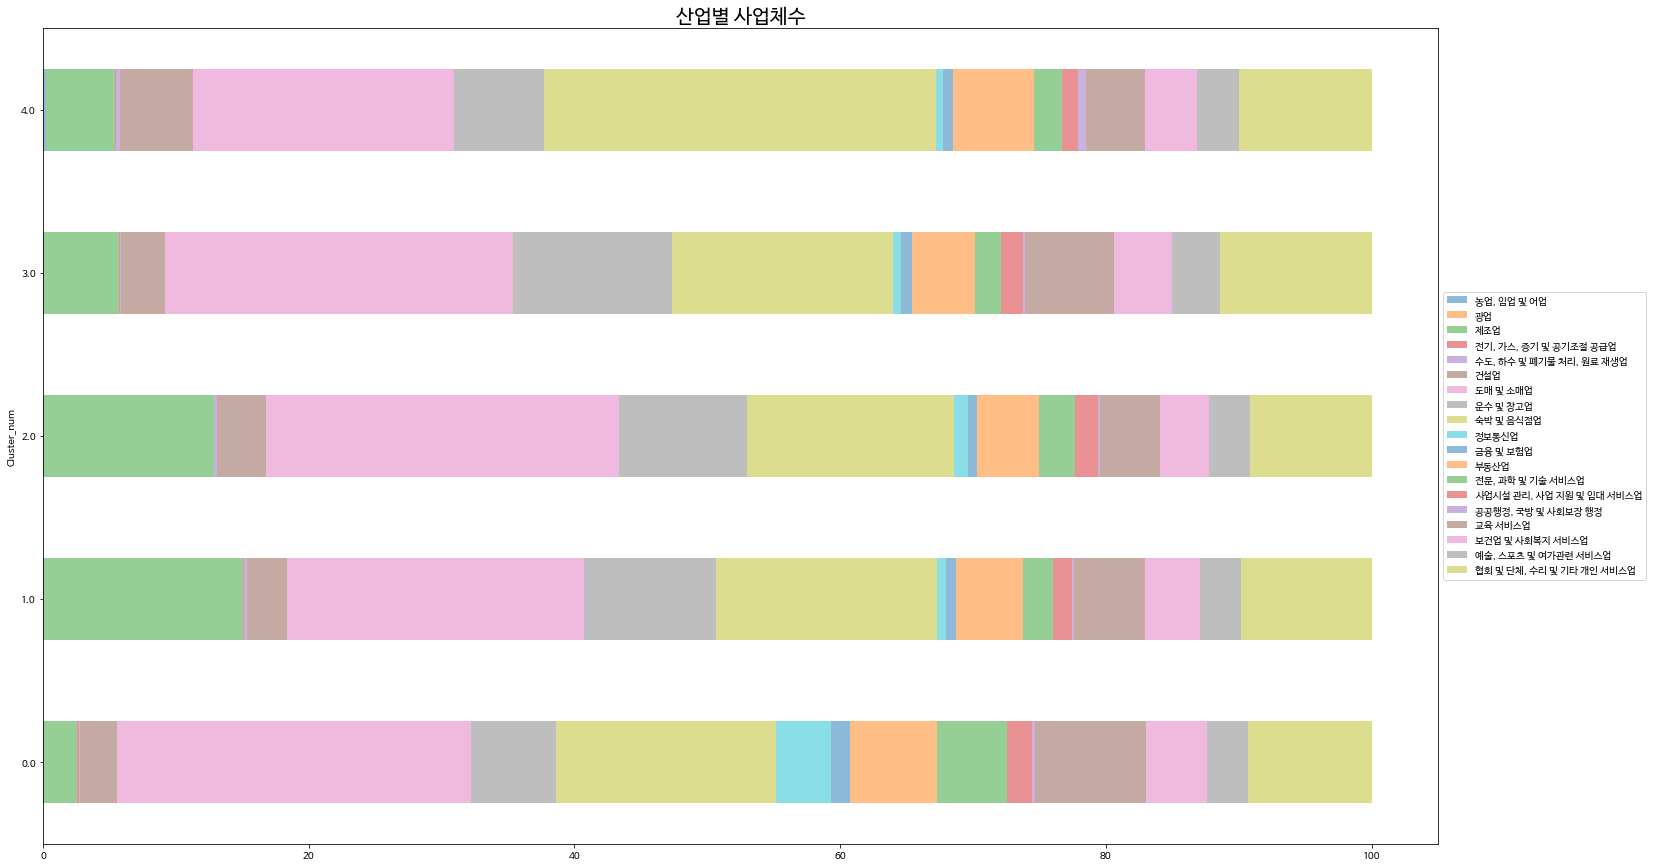

In [ ]:
industry_n_ratio_t_cluster = industry_n_ratio_t.groupby('Cluster_num').mean()
industry_n_ratio_t_cluster.plot.barh(alpha=0.5, stacked=True, figsize=(25, 15))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('산업별 사업체수', fontsize=20);

In [ ]:
industry_n_ratio_t_cluster

,"농업, 임업 및 어업",광업,제조업,"전기, 가스, 증기 및 공기조절 공급업","수도, 하수 및 폐기물 처리, 원료 재생업",건설업,도매 및 소매업,운수 및 창고업,숙박 및 음식점업,정보통신업,금융 및 보험업,부동산업,"전문, 과학 및 기술 서비스업","사업시설 관리, 사업 지원 및 임대 서비스업","공공행정, 국방 및 사회보장 행정",교육 서비스업,보건업 및 사회복지 서비스업,"예술, 스포츠 및 여가관련 서비스업","협회 및 단체, 수리 및 기타 개인 서비스업"
Cluster_num,,,,,,,,,,,,,,,,,,,
0.0,0.009099,0.000000,2.538595,0.181978,0.060659,2.787298,26.656759,6.351036,16.611568,4.109672,1.428528,6.566377,5.292530,1.880440,0.169846,8.343696,4.652573,3.029935,9.329411
1.0,0.029788,0.005979,15.038070,0.029258,0.249085,3.053816,22.310718,9.962509,16.629357,0.634868,0.802250,5.029973,2.232551,1.419607,0.206216,5.289130,4.154104,3.097598,9.825124
2.0,0.026735,0.003186,12.847285,0.032916,0.188726,3.667028,26.617694,9.636325,15.526883,1.100931,0.663517,4.641652,2.755709,1.711295,0.157408,4.492035,3.728251,3.072645,9.129781
3.0,0.024701,0.000000,5.710140,0.029373,0.146494,3.248063,26.252603,11.955429,16.599557,0.650086,0.759758,4.742950,1.996898,1.619831,0.168393,6.692278,4.416799,3.571746,11.414900
4.0,0.239177,0.000000,5.166228,0.083712,0.298972,5.524994,19.600574,6.780674,29.490552,0.597943,0.681655,6.099019,2.128677,1.219804,0.597943,4.460655,3.910548,3.145181,9.973691


# 종사자 수

In [ ]:
industry_p = ggd_industry[ggd_industry['']=='종사자수 (명)']
industry_p = industry_p.drop(['','전산업'],axis=1)

In [ ]:
industry_p = industry_p.astype('float')
industry_p_ratio = industry_p.T.div(industry_p.T.sum(), axis=1, level=1)*100

## 군집별 산업군별 종사자 수

In [ ]:
industry_p_ratio_t = industry_p_ratio.T
industry_p_ratio_t = industry_p_ratio_t.fillna(0)
industry_p_ratio_t.reset_index(inplace=True)

In [ ]:
industry_p_ratio_t.rename(columns={'index' : '컬럼2'}, inplace=True)

In [ ]:
industry_p_ratio_t['Cluster_num'] = industry_p_ratio_t['컬럼2'].map(lambda x : int_cluster(x))

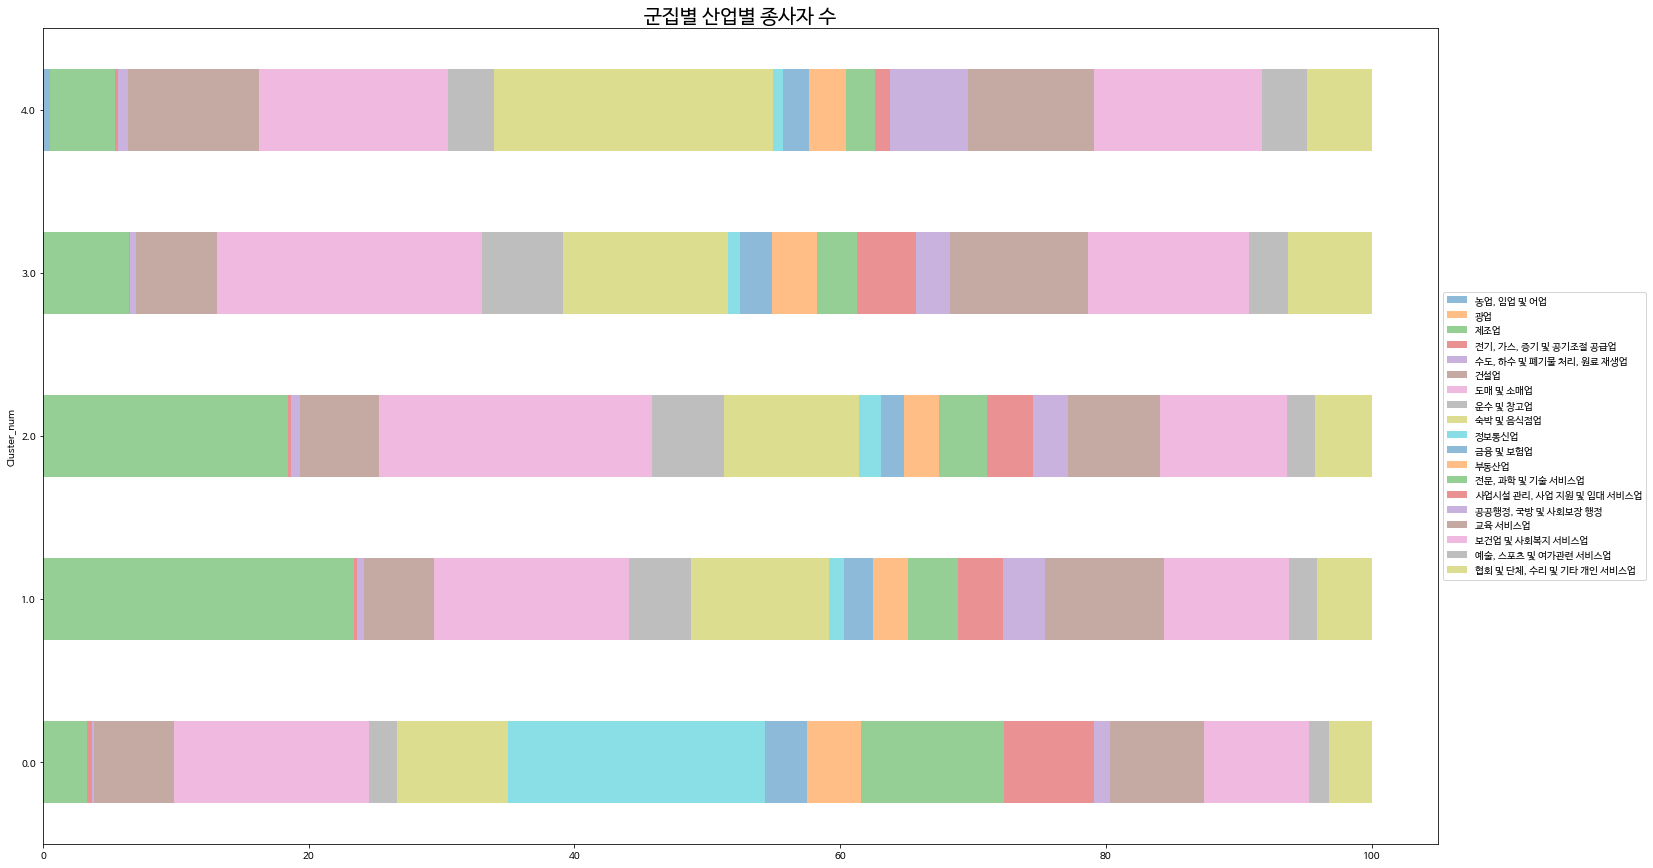

In [ ]:
industry_p_ratio_t_cluster = industry_p_ratio_t.groupby('Cluster_num').mean()
industry_p_ratio_t_cluster.plot.barh(alpha=0.5, stacked=True, figsize=(25, 15))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('군집별 산업별 종사자 수', fontsize=20);

In [ ]:
industry_p_ratio_t_cluster

,"농업, 임업 및 어업",광업,제조업,"전기, 가스, 증기 및 공기조절 공급업","수도, 하수 및 폐기물 처리, 원료 재생업",건설업,도매 및 소매업,운수 및 창고업,숙박 및 음식점업,정보통신업,금융 및 보험업,부동산업,"전문, 과학 및 기술 서비스업","사업시설 관리, 사업 지원 및 임대 서비스업","공공행정, 국방 및 사회보장 행정",교육 서비스업,보건업 및 사회복지 서비스업,"예술, 스포츠 및 여가관련 서비스업","협회 및 단체, 수리 및 기타 개인 서비스업"
Cluster_num,,,,,,,,,,,,,,,,,,,
0.0,0.011169,0.000000,3.316131,0.386307,0.107089,6.067913,14.641565,2.131588,8.373601,19.300574,3.203458,4.056553,10.746302,6.803736,1.204253,7.027439,7.883162,1.567237,3.171923
1.0,0.035205,0.013674,23.392738,0.201563,0.541131,5.255114,14.635568,4.720062,10.390493,1.135199,2.132874,2.686730,3.735626,3.412278,3.135237,8.922045,9.475592,2.044684,4.134188
2.0,0.036136,0.004289,18.437476,0.165062,0.705970,5.959059,20.522452,5.422509,10.200101,1.650072,1.681403,2.652746,3.606510,3.489694,2.607871,6.964762,9.500997,2.143696,4.249193
3.0,0.035334,0.000000,6.407127,0.103638,0.459169,6.064923,19.985625,6.085845,12.384549,0.902868,2.429646,3.388393,3.011984,4.447863,2.543673,10.418020,12.087376,2.983892,6.260076
4.0,0.509752,0.000000,4.923537,0.195354,0.741736,9.868441,14.276121,3.467538,20.979213,0.744788,1.962700,2.762431,2.194683,1.120234,5.888099,9.444156,12.688868,3.388175,4.844174


# 대학교 개수

In [ ]:
univ = pd.read_csv('/content/drive/MyDrive/아이펠_해커톤/hackathon_data/전문및대학교현황.csv', encoding = 'cp949')
univ.head()

In [ ]:
univ = univ.drop(['시설구분명','공사립구분명'],axis=1)
univ.head()

## 군집별 대학교 수

In [ ]:
ggd_univ['Cluster_num'] = ggd_univ['컬럼2'].map(lambda x : int_cluster(x))

In [ ]:
ggd_univ_cluster = pd.DataFrame(ggd_univ.groupby('Cluster_num')['대학개수'].mean())
ggd_univ_cluster

,대학개수
Cluster_num,
0,1.0
1,4.0
2,1.0
3,5.0
4,1.0


Text(0.5, 1.0, 'Cluster별 대학 개수')

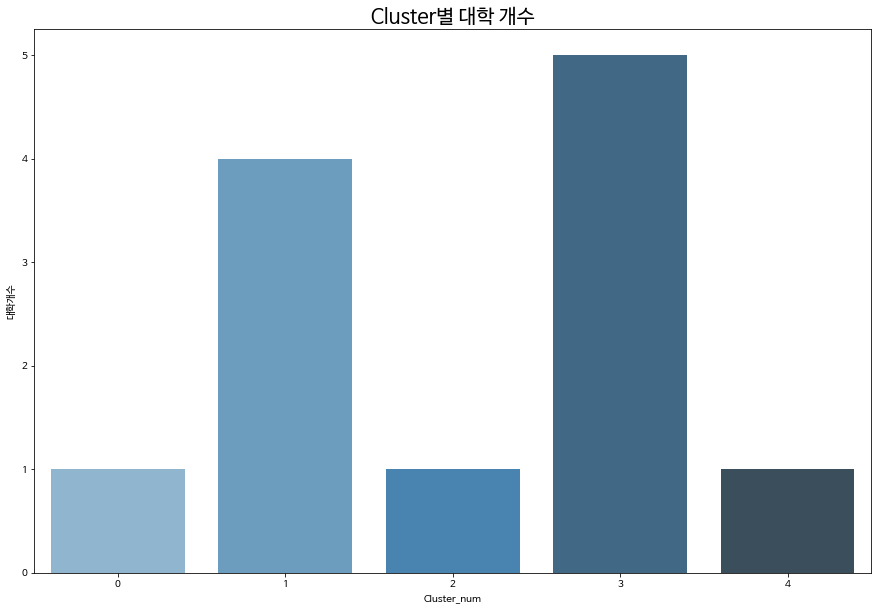

In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(data=ggd_univ_cluster,x=ggd_univ_cluster.index,y=ggd_univ_cluster['대학개수'],palette='Blues_d')
plt.title('Cluster별 대학 개수',fontsize=20)

# 초등학교/어린이집/유치원

## 초등학교

In [ ]:
school = pd.read_csv('/content/drive/MyDrive/아이펠_해커톤/hackathon_data/경기도 초․ 중, 고등학교 위치현황(개방표준).csv', encoding = 'cp949')
school.head()

## 유치원/어린이집

In [ ]:
kid = pd.read_csv('/content/drive/MyDrive/아이펠_해커톤/hackathon_data/어린이집및유치원현황.csv', encoding = 'cp949')
kid

## 군집별 초등학교/유치원/어린이집 수

In [ ]:
kid_elementary_count['Cluster_num'] = kid_elementary_count['컬럼2'].map(lambda x : int_cluster(x))

In [ ]:
kid_elementary_count_cluster = pd.DataFrame(kid_elementary_count.groupby('Cluster_num')['합계'].mean())
kid_elementary_count_cluster

,합계
Cluster_num,
0,376.000000
1,481.333333
2,409.000000
3,320.666667
4,103.000000


Text(0.5, 1.0, 'Cluster별 초등학교/유치원/어린이집 수')

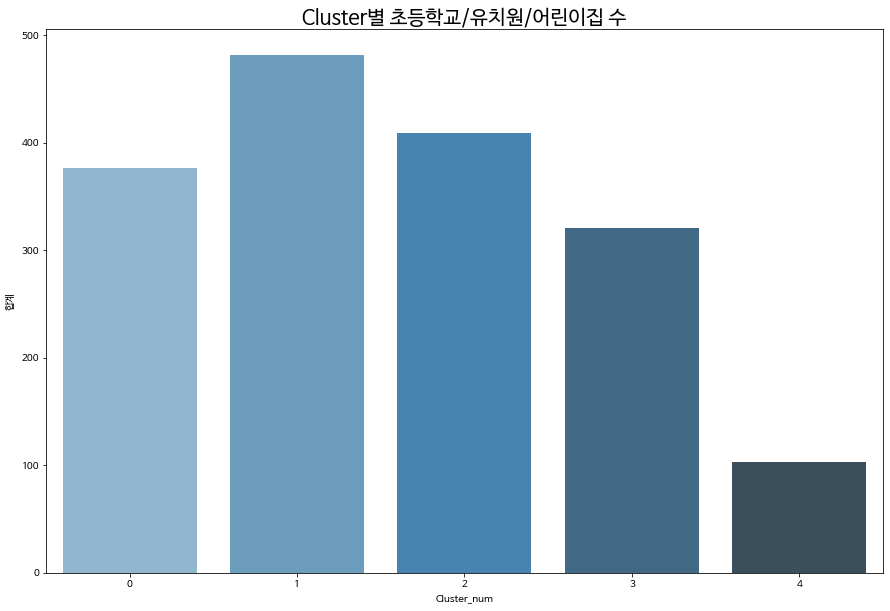

In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(data=kid_elementary_count_cluster,x=kid_elementary_count_cluster.index,y=kid_elementary_count_cluster['합계'],palette='Blues_d')
plt.title('Cluster별 초등학교/유치원/어린이집 수',fontsize=20)

# 월평균 소득

In [ ]:
income = pd.read_csv('/content/drive/MyDrive/아이펠_해커톤/hackathon_data/경기도 월평균 가구소득 비율.csv', encoding = 'cp949')
income.head()

In [ ]:
ggd_income = income[(income['구분별(1)']=='지역별') | (income['구분별(1)']=='구분별(1)')]
ggd_income = ggd_income.drop(['구분별(1)','2019','2019.1','2019.2','2019.3','2019.4','2019.5','2019.6','2019.7'], axis=1)
ggd_income = ggd_income.iloc[2:]
ggd_income.columns = ['','100만원 미만', '100 ~ 200만원 미만',	'200 ~ 300만원 미만', '300 ~ 400만원 미만',	'400 ~ 500만원 미만',	'500 ~ 600만원 미만',	'600 ~ 700만원 미만',	'700만원 이상']
ggd_income[['100만원 미만', '100 ~ 200만원 미만',	'200 ~ 300만원 미만', '300 ~ 400만원 미만',	'400 ~ 500만원 미만',	'500 ~ 600만원 미만',	'600 ~ 700만원 미만',	'700만원 이상']] = ggd_income[['100만원 미만', '100 ~ 200만원 미만',	'200 ~ 300만원 미만', '300 ~ 400만원 미만',	'400 ~ 500만원 미만',	'500 ~ 600만원 미만',	'600 ~ 700만원 미만',	'700만원 이상']].astype('float')
ggd_income

In [ ]:
ggd_income['월평균 가구소득'] = (ggd_income['100만원 미만']*50 + ggd_income['100 ~ 200만원 미만']*150 + ggd_income['200 ~ 300만원 미만']*250 + ggd_income['300 ~ 400만원 미만']*350 + ggd_income['400 ~ 500만원 미만']*450 + ggd_income['500 ~ 600만원 미만']*550 + ggd_income['600 ~ 700만원 미만']*650 + ggd_income['700만원 이상']*700)/100
ggd_income

## 군집별 월평균 가구소득

In [ ]:
ggd_income_mean['Cluster_num'] = ggd_income_mean['컬럼2'].map(lambda x : int_cluster(x))

In [ ]:
ggd_income_mean_cluster = pd.DataFrame(ggd_income_mean.groupby('Cluster_num')['월평균_가구소득'].mean())
ggd_income_mean_cluster

,월평균_가구소득
Cluster_num,
0,514.675000
1,345.508333
2,343.712500
3,353.816667
4,218.550000


Text(0.5, 1.0, 'Cluster별 월평균 가구소득')

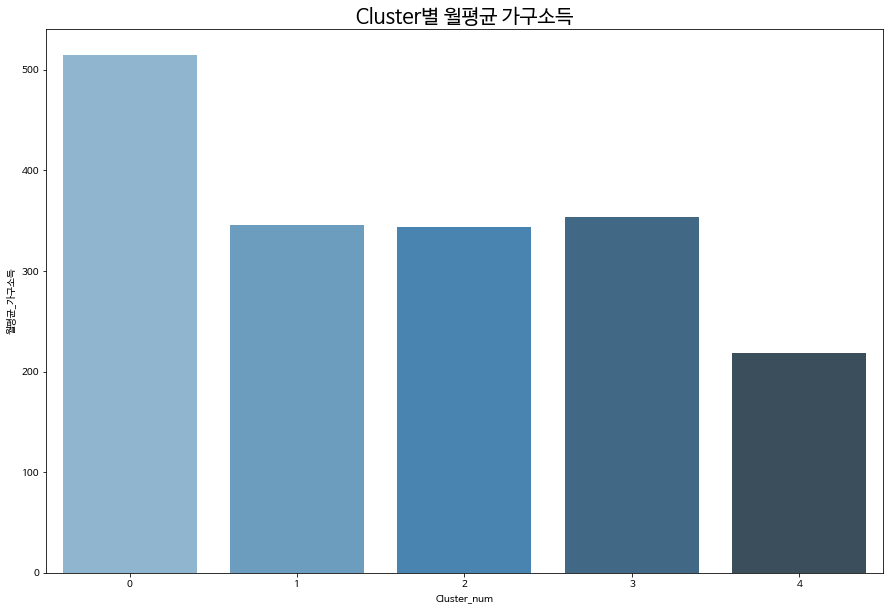

In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(data=ggd_income_mean_cluster,x=ggd_income_mean_cluster.index,y=ggd_income_mean_cluster['월평균_가구소득'],palette='Blues_d')
plt.title('Cluster별 월평균 가구소득',fontsize=20)

# 대형마트 개수

In [ ]:
mall = pd.read_csv('/content/drive/MyDrive/아이펠_해커톤/hackathon_data/대규모점포현황.csv', encoding = 'cp949')
mall.head()

In [ ]:
mall.rename(columns = {'시군명':'컬럼2'}, inplace=True)
mall.head()

In [ ]:
mall.columns

In [ ]:
mall['영업상태명'].value_counts()

정상영업     473
폐업처리     124
휴업처리     114
직권취소      52
영업개시전     30
Name: 영업상태명, dtype: int64

In [ ]:
mall = mall[((mall['폐업일자'] > 20191231) & (mall['인허가일자'] < 20191231)) | (mall['영업상태명'] == '정상영업')]

In [ ]:
mall["업태구분명정보"].value_counts()

대형마트          125
그 밖의 대규모점포    119
구분없음          109
쇼핑센터           47
전문점            29
복합쇼핑몰          25
백화점            24
시장             20
Name: 업태구분명정보, dtype: int64

## 군집별 대형마트 개수

In [ ]:
ggdmall_df['Cluster_num'] = ggdmall_df['컬럼2'].map(lambda x : int_cluster(x))

In [ ]:
ggdmall_df_cluster = pd.DataFrame(ggdmall_df.groupby('Cluster_num')['대형마트개수'].mean())
ggdmall_df_cluster

,대형마트개수
Cluster_num,
0,22.500000
1,11.500000
2,8.750000
3,11.666667
4,2.000000


Text(0.5, 1.0, 'Cluster별 대형마트 개수')

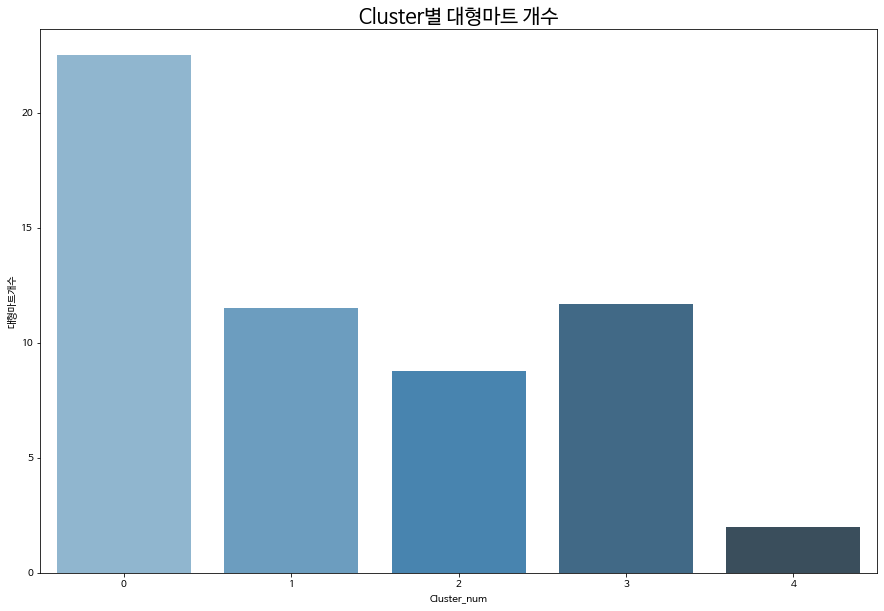

In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(data=ggdmall_df_cluster,x=ggdmall_df_cluster.index,y=ggdmall_df_cluster['대형마트개수'],palette='Blues_d')
plt.title('Cluster별 대형마트 개수',fontsize=20)

# 주택 수

In [ ]:
df_house = pd.read_csv('/content/drive/MyDrive/아이펠_해커톤/hackathon_data/주택의_종류별_주택읍면동_2015_2020___시군구_20162019__20220601185112.csv', encoding='cp949')

In [ ]:
house_count = df_house.copy()
house_count

In [ ]:
house_count = house_count.rename(columns=house_count.iloc[0])
house_count = house_count.drop(house_count.index[:2])
house_count.reset_index(drop=True, inplace=True)
house_count

In [ ]:
house_count.rename(columns={'행정구역별(읍면동)' : '컬럼2'}, inplace=True)
house_count

In [ ]:
house_count['주택'] = house_count['주택'].astype(int)
house_count['아파트'] = house_count['아파트'].astype(int)
house_count['연립주택'] = house_count['연립주택'].astype(int)
house_count['다세대주택'] = house_count['다세대주택'].astype(int)
house_count['비거주용건물내주택'] = house_count['비거주용건물내주택'].astype(int)

In [ ]:
house_count['합계'] = house_count['주택'] + house_count['아파트'] + house_count['연립주택'] + house_count['다세대주택'] + house_count['비거주용건물내주택']

In [ ]:
house_count

In [ ]:
house_count.rename(columns={'합계' : '총주택수'}, inplace=True)

## 군집별 총 주택 수

In [ ]:
house_count['Cluster_num'] = house_count['컬럼2'].map(lambda x : int_cluster(x))

In [ ]:
house_count_cluster = pd.DataFrame(house_count.groupby('Cluster_num')['총주택수'].mean())
house_count_cluster

,총주택수
Cluster_num,
0,236257.000000
1,272751.000000
2,223407.750000
3,202483.666667
4,61602.000000


Text(0.5, 1.0, 'Cluster별 총주택 수')

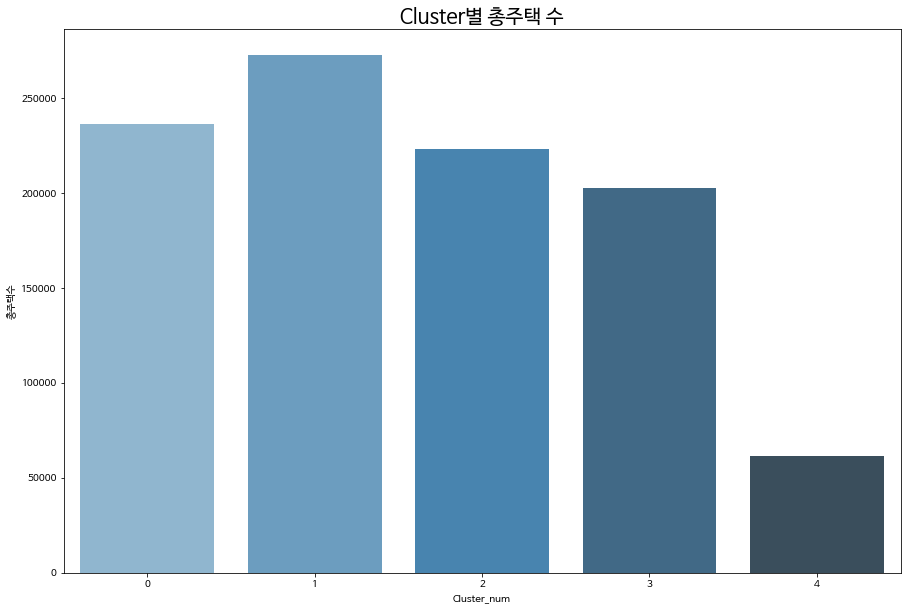

In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(data=house_count_cluster,x=house_count_cluster.index,y=house_count_cluster['총주택수'],palette='Blues_d')
plt.title('Cluster별 총주택 수',fontsize=20)

# 자동차 등록대수

In [ ]:
car_count = pd.read_csv('/content/drive/MyDrive/아이펠_해커톤/hackathon_data/자동차등록집계현황.csv', encoding='cp949')

In [ ]:
car_count

In [ ]:
car_count.columns

Index(['시군명', '시군구명', '승용(관용)', '승용(자가용)', '승용(영업용)', '승용(관용+자가용+영업용)',
       '승합(관용)', '승합(자가용)', '승합(영업용)', '승합(관용+자가용+영업용)', '화물(관용)', '화물(자가용)',
       '화물(영업용)', '화물(관용+자가용+영업용)', '특수(관용)', '특수(자가용)', '특수(영업용)',
       '특수(관용+자가용+영업용)', '관용 자동차(승용+승합+화물+특수) 등록대수',
       '자가용 자동차(승용+승합+화물+특수) 등록대수', '영업용 자동차(승용+승합+화물+특수) 등록대수', '총계'],
      dtype='object')

In [ ]:
car_count.index

RangeIndex(start=0, stop=95, step=1)

## 군집별 자동차 등록대수

In [ ]:
car_count_group['Cluster_num'] = car_count_group['컬럼2'].map(lambda x : int_cluster(x))

In [ ]:
car_count_cluster = car_count_group.groupby('Cluster_num').sum()

In [ ]:
car_count_cluster.sort_values(by = '총계', ascending=False)

,총계
Cluster_num,
1,1109819.5
2,632257.5
3,371067.5
0,318487.5
4,62414.5


Text(0.5, 1.0, 'Cluster별 자동차 등록대수')

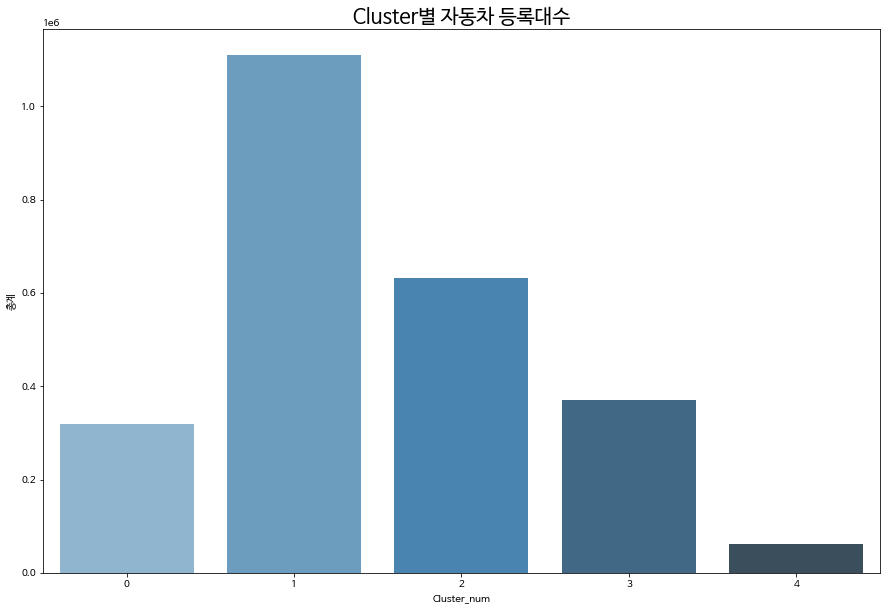

In [ ]:
plt.figure(figsize=(15,10))

sns.barplot(data=car_count_cluster,x=car_count_cluster.index,y=car_count_cluster['총계'],palette='Blues_d')
plt.title('Cluster별 자동차 등록대수',fontsize=20)

In [ ]:
# 1군집
1109819.5 / 2024693

0.5481421133969446

In [ ]:
# 0군집
318487.5 / 819686

0.38854817576486606

In [ ]:
# 2군집
632257.5 / 1885394

0.3353450260263902

In [ ]:
# 3군집
371067.5 / 951011

0.39018213248847805

In [ ]:
# 4군집
62414.5 / 116114

0.5375277744285788